In [1]:
# Instalação do pacote wquantiles.

!pip install wquantiles

In [2]:
# Importando as bibliotecas.

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

In [3]:
# Carregando os datasets.

from google.colab import drive
drive.mount('/content/drive')

data1 = pd.read_csv('/content/drive/My Drive/train.csv')
data2 = pd.read_csv('/content/drive/My Drive/test.csv')

data1 = pd.DataFrame(data1)
data2 = pd.DataFrame(data2)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# 1. Análise exploratória de dados: Faça uma análise exploratória dos dados para entender a
# distribuição das variáveis e identificar possíveis correlações entre elas.

data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [5]:
# Estimativas de localização.
# Coluna LotArea.

data2['LotArea'].mean()

9819.161069225496

In [6]:
trim_mean(data2.loc[:, 'LotArea'], 0.1)

9435.009409751925

In [7]:
data2['LotArea'].median()

9399.0

In [8]:
np.average(data2['MSSubClass'], weights=data2['LotArea'])

49.627215423313835

In [9]:
# Coluna OverallQual.

data2['OverallQual'].mean()

6.078821110349555

In [10]:
trim_mean(data2.loc[:, 'OverallQual'], 0.1)

6.058169375534645

In [11]:
data2['OverallQual'].median()

6.0

In [12]:
np.average(data2['MSSubClass'], weights=data2['OverallQual'])

57.7286052542564

In [13]:
# Coluna OverallCond.

data2['OverallCond'].mean()

5.5538039753255655

In [14]:
trim_mean(data2.loc[:, 'OverallCond'], 0.1)

5.4627887082976905

In [15]:
data2['OverallCond'].median()

5.0

In [16]:
np.average(data2['MSSubClass'], weights=data2['OverallCond'])

56.763544366284094

In [17]:
# Coluna YearBuilt.

data2['YearBuilt'].mean()

1971.357779300891

In [18]:
trim_mean(data2.loc[:, 'YearBuilt'], 0.1)

1974.2549187339607

In [19]:
data2['YearBuilt'].median()

1973.0

In [20]:
np.average(data2['MSSubClass'], weights=data2['YearBuilt'])

57.40524078379507

In [21]:
# Coluna YearRemodAdd.

data2['YearRemodAdd'].mean()

1983.6627827278958

In [22]:
trim_mean(data2.loc[:, 'YearRemodAdd'], 0.1)

1984.8716852010266

In [23]:
data2['YearRemodAdd'].median()

1992.0

In [24]:
np.average(data2['MSSubClass'], weights=data2['YearRemodAdd'])

57.3994182776097

In [25]:
# Coluna GarageCars.

data2['GarageCars'].mean()

1.7661179698216736

In [26]:
trim_mean(data2.loc[:, 'GarageCars'], 0.1)

1.7630453378956372

In [27]:
data2['GarageCars'].median()

2.0

In [28]:
np.average(data2['MSSubClass'], weights=data2['GarageCars'])

nan

In [29]:
# Coluna GarageArea.

data2['GarageArea'].mean()

472.76886145404666

In [30]:
trim_mean(data2.loc[:, 'GarageArea'], 0.1)

467.2814371257485

In [31]:
data2['GarageArea'].median()

480.0

In [32]:
np.average(data2['MSSubClass'], weights=data2['GarageArea'])

nan

In [33]:
data2.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,1459.0,NaN,NaN,NaN,2190.0,421.321334,1461.0,1825.5,2190.0,2554.5,2919.0
MSSubClass,1459.0,NaN,NaN,NaN,57.378341,42.74688,20.0,20.0,50.0,70.0,190.0
MSZoning,1455,5,RL,1114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,1232.0,NaN,NaN,NaN,68.580357,22.376841,21.0,58.0,67.0,80.0,200.0
LotArea,1459.0,NaN,NaN,NaN,9819.161069,4955.517327,1470.0,7391.0,9399.0,11517.5,56600.0
...,...,...,...,...,...,...,...,...,...,...,...
MiscVal,1459.0,NaN,NaN,NaN,58.167923,630.806978,0.0,0.0,0.0,0.0,17000.0
MoSold,1459.0,NaN,NaN,NaN,6.104181,2.722432,1.0,4.0,6.0,8.0,12.0
YrSold,1459.0,NaN,NaN,NaN,2007.769705,1.30174,2006.0,2007.0,2008.0,2009.0,2010.0
SaleType,1458,9,WD,1258,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# Estimativas de variabilidade.
# Coluna LotArea.

data2['LotArea'].std() # Desvio Padrão.

4955.51732692645

In [35]:
data2['LotArea'].quantile(0.75) - data2['LotArea'].quantile(0.25) #IQR.

4126.5

In [36]:
# Desvio Absoluto da Mediana.

robust.scale.mad(data2['LotArea'])

3077.8822056176296

In [37]:
# Coluna OverallQual.

data2['OverallQual'].std() #Desvio Padrão.

1.4368116404730182

In [38]:
data2['OverallQual'].quantile(0.75) - data2['OverallQual'].quantile(0.25) #IQR.

2.0

In [39]:
# Desvio Absoluto da Mediana.

robust.scale.mad(data2['OverallQual'])

1.482602218505602

In [40]:
# Coluna OverallCond.

data2['OverallCond'].std() #Desvio Padrão.

1.1137396032892084

In [41]:
data2['OverallCond'].quantile(0.75) - data2['OverallCond'].quantile(0.25) #IQR.

1.0

In [42]:
# Desvio Absoluto da Mediana.

robust.scale.mad(data2['OverallCond'])

0.0

In [43]:
# Coluna YearBuilt.

data2['YearBuilt'].std() #Desvio Padrão.

30.39007083720525

In [44]:
data2['YearBuilt'].quantile(0.75) - data2['YearBuilt'].quantile(0.25) #IQR.

48.0

In [45]:
# Desvio Absoluto da Mediana.

robust.scale.mad(data2['YearBuilt'])

37.065055462640046

In [46]:
# Coluna YearRemodAdd.

data2['YearRemodAdd'].std() # Desvio Padrão.

21.13046690817047

In [47]:
data2['YearRemodAdd'].quantile(0.75) - data2['YearRemodAdd'].quantile(0.25) #IQR.

41.0

In [48]:
# Desvio Absoluto da Mediana.

robust.scale.mad(data2['YearRemodAdd'])

22.239033277584028

In [49]:
# Coluna GarageCars.
data2['GarageCars'].std() # Desvio Padrão.

0.7759450711253341

In [50]:
data2['GarageCars'].quantile(0.75) - data2['GarageCars'].quantile(0.25) #IQR.

1.0

In [51]:
# Desvio Absoluto da Mediana.

robust.scale.mad(data2['GarageCars'])

nan

In [52]:
# Coluna GarageArea.
data2['GarageArea'].std() # Desvio Padrão.

217.04861112784332

In [53]:
data2['GarageArea'].quantile(0.75) - data2['GarageArea'].quantile(0.25) #IQR.

258.0

In [54]:
# Desvio Absoluto da Mediana.

robust.scale.mad(data2['GarageArea'])

nan

In [55]:
# PERCENTIS e QUARTIS:

In [56]:
# Coluna LotArea.

percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = pd.DataFrame(data2['LotArea'].quantile(percentages))
df.index = [f'{p * 100}%' for p in percentages]
df.transpose()

,5.0%,25.0%,50.0%,75.0%,95.0%
LotArea,3085.5,7391.0,9399.0,11517.5,16873.0


In [57]:
# Coluna OverallQual.

percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = pd.DataFrame(data2['OverallQual'].quantile(percentages))
df.index = [f'{p * 100}%' for p in percentages]
df.transpose()

,5.0%,25.0%,50.0%,75.0%,95.0%
OverallQual,4.0,5.0,6.0,7.0,9.0


In [58]:
# Coluna OverallCond.

percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = pd.DataFrame(data2['OverallCond'].quantile(percentages))
df.index = [f'{p * 100}%' for p in percentages]
df.transpose()

,5.0%,25.0%,50.0%,75.0%,95.0%
OverallCond,4.0,5.0,5.0,6.0,8.0


In [59]:
# Coluna YearBuilt.

percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = pd.DataFrame(data2['YearBuilt'].quantile(percentages))
df.index = [f'{p * 100}%' for p in percentages]
df.transpose()

,5.0%,25.0%,50.0%,75.0%,95.0%
YearBuilt,1915.0,1953.0,1973.0,2001.0,2007.0


In [60]:
# Coluna YearRemodAdd.

percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = pd.DataFrame(data2['YearRemodAdd'].quantile(percentages))
df.index = [f'{p * 100}%' for p in percentages]
df.transpose()

,5.0%,25.0%,50.0%,75.0%,95.0%
YearRemodAdd,1950.0,1963.0,1992.0,2004.0,2007.0


In [61]:
# Coluna GarageCars.
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = pd.DataFrame(data2['GarageCars'].quantile(percentages))
df.index = [f'{p * 100}%' for p in percentages]
df.transpose()

,5.0%,25.0%,50.0%,75.0%,95.0%
GarageCars,0.0,1.0,2.0,2.0,3.0


In [62]:
# Coluna GarageArea.

percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = pd.DataFrame(data2['GarageArea'].quantile(percentages))
df.index = [f'{p * 100}%' for p in percentages]
df.transpose()

,5.0%,25.0%,50.0%,75.0%,95.0%
GarageArea,0.0,318.0,480.0,576.0,864.0


In [63]:
# Coluna PoolArea.

percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = pd.DataFrame(data2['PoolArea'].quantile(percentages))
df.index = [f'{p * 100}%' for p in percentages]
df.transpose()

,5.0%,25.0%,50.0%,75.0%,95.0%
PoolArea,0.0,0.0,0.0,0.0,0.0


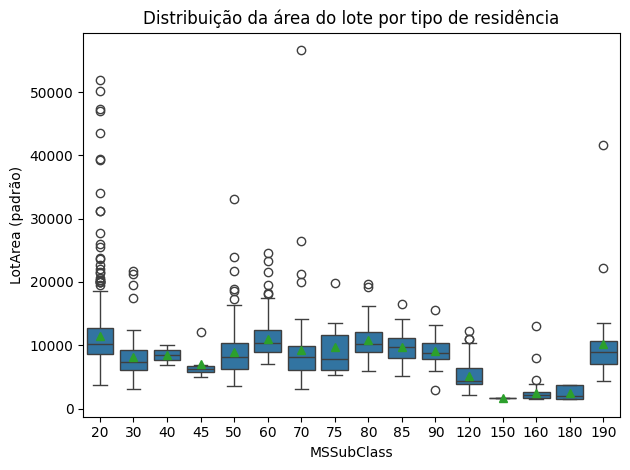

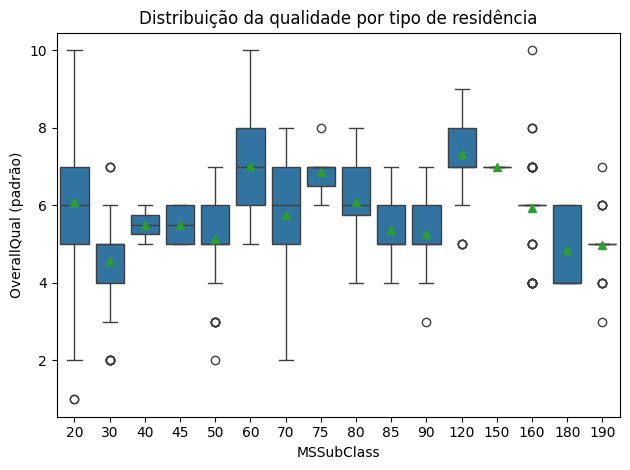

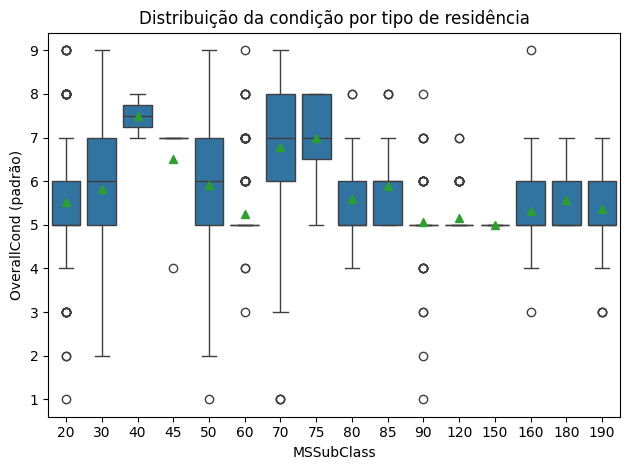

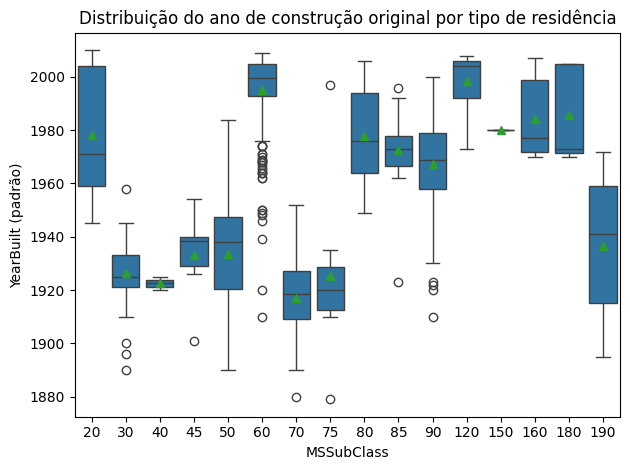

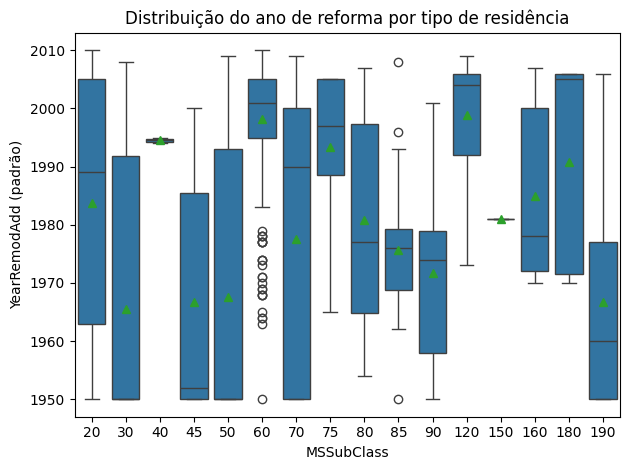

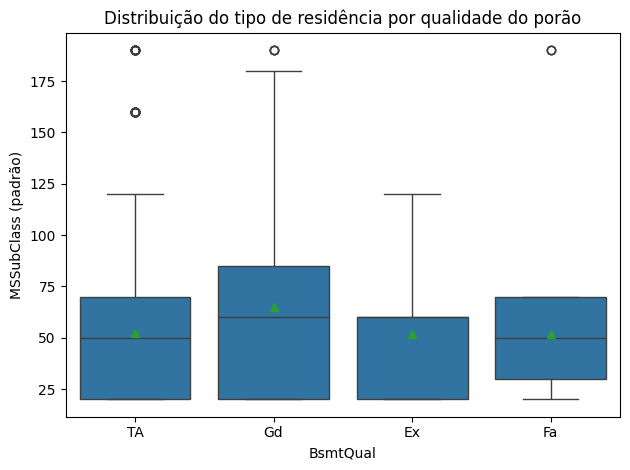

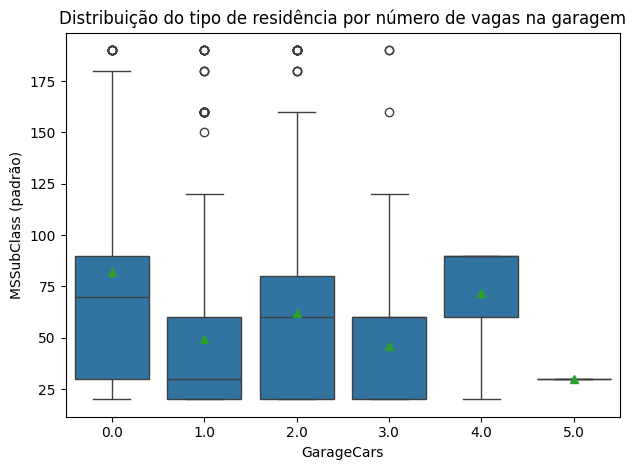

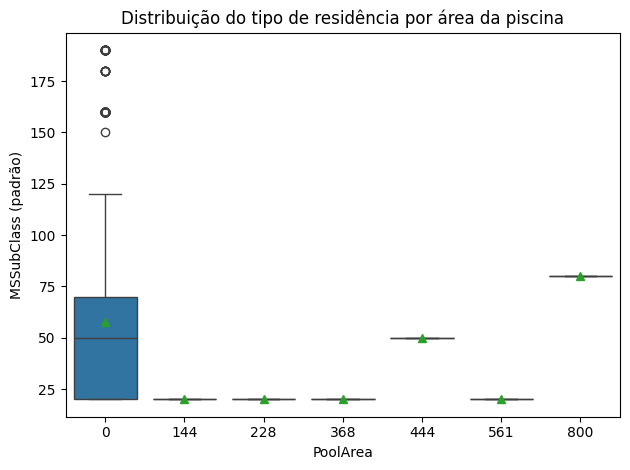

In [64]:
# Boxplots.

# Esse gráfico permite ver a localização, a variabilidade e a simetria dos dados, bem como identificar
# possíveis outliers ou valores extremos.

# Padrão da escala do sns.boxplot é 10.

# Distribuição por tipo de residência MSSubClass:

# Coluna LotArea.
sns.boxplot(x='MSSubClass', y='LotArea', data=data2, showmeans=True)
plt.title('Distribuição da área do lote por tipo de residência')
plt.ylabel('LotArea (padrão)')
plt.tight_layout()
plt.show()

# Coluna OverallQual.
sns.boxplot(x='MSSubClass', y='OverallQual', data=data2, showmeans=True)
plt.title('Distribuição da qualidade por tipo de residência')
plt.ylabel('OverallQual (padrão)')
plt.tight_layout()
plt.show()

# Coluna OverallCond.
sns.boxplot(x='MSSubClass', y='OverallCond', data=data2, showmeans=True)
plt.title('Distribuição da condição por tipo de residência')
plt.ylabel('OverallCond (padrão)')
plt.tight_layout()
plt.show()

# Coluna YearBuilt.
sns.boxplot(x='MSSubClass', y='YearBuilt', data=data2, showmeans=True)
plt.title('Distribuição do ano de construção original por tipo de residência')
plt.ylabel('YearBuilt (padrão)')
plt.tight_layout()
plt.show()

# Coluna YearRemodAdd.
sns.boxplot(x='MSSubClass', y='YearRemodAdd', data=data2, showmeans=True)
plt.title('Distribuição do ano de reforma por tipo de residência')
plt.ylabel('YearRemodAdd (padrão)')
plt.tight_layout()
plt.show()


# Distribuição por qualidade do porão BsmtQual:

# Coluna MSSubClass.
sns.boxplot(x='BsmtQual', y='MSSubClass', data=data2, showmeans=True)
plt.title('Distribuição do tipo de residência por qualidade do porão')
plt.ylabel('MSSubClass (padrão)')
plt.tight_layout()
plt.show()

# Distribuição por número de vagas na garagem GarageCars:

# Coluna MSSubClass.
sns.boxplot(x='GarageCars', y='MSSubClass', data=data2, showmeans=True)
plt.title('Distribuição do tipo de residência por número de vagas na garagem')
plt.ylabel('MSSubClass (padrão)')
plt.tight_layout()
plt.show()

# Distribuição por área da piscina

# Coluna MSSubClass.
sns.boxplot(x='PoolArea', y='MSSubClass', data=data2, showmeans=True)
plt.title('Distribuição do tipo de residência por área da piscina')
plt.ylabel('MSSubClass (padrão)')
plt.tight_layout()
plt.show()

In [65]:
# Descrições:

# Distribuição por tipo de residência MSSubClass:

# coluna LotArea:
# - o tipo de residência pode ser um fator que influência a distribuição da área do lote
# - as residência de tipo 120 e 180 apresentam melhor distribuição da área do lote em relação as demais
# - há mais variabilidade na residência de tipo 75 em relação as demais

# coluna OverallQual:
# - o tipo de residência pode ser um fator que influência a distribuição da qualidade
# - há residência de tipo 80 apresenta melhor distribuição da qualidade em relação as demais
# - há mais variabilidade nas residências de tipo 20, 60, 70 e 180

# coluna OverallCond:
# - o tipo de residência pode ser um fator que influência a distribuição da condição
# - as residências de tipo 75 apresentam melhor distribuição das condições em relação as demais
# - há mais variabilidade em todas as residências exceto as de tipo 30, 50 e 70

# coluna YearBuilt
# - o tipo de residência pode ser um fator que influência no ano de construção original
# - a residência de tipo 180 aparenta ter uma melhor influência em relação as demais
# - há mais variabilidade nas residências de tipo 20 e 190

# coluna YearRemodAdd
# - o tipo de residência pode ser um fator que influência no ano de reforma
# - a residência de tipo 45 aparenta ter uma melhor influência em relação as demais
# - há mais variabilidade na residência de tipo 70

# Distribuição por qualidade do porão BsmtQual:

# coluna MSSubClass:
# - a qualidade do porão pode ser um fator que influência no tipo de residência
# - o porão de qualidade GD apresenta melhor influência no tipo de residência
# - há mais variabilidade na qualidade de tipo GD

# Distribuição por número de vagas na garagem GarageCars:

# coluna MSSubClass:
# - o número de vagas na garagem pode ser um fator que influência no tipo de residência
# - as garagens com 1 única vaga apresentam melhor influência no influência no tipo de residência em relação as demais
# - as garagens com 0 e 2 vagas apresentam mais variabilidade

# Distribuição por área da piscina

# coluna MSSubClass:
# - a área da piscina pode ser um fator que influência no tipo de residência
# - há distribuição do tipo 0 apresenta melhor influência no tipo de residência em relação as demais
# - há mais variabilidade na distribuição do tipo 0

In [66]:
# Tabelas de Frequência:

# coluna OverallQual
binnedPopulation = pd.cut(data2['OverallQual'], 10)
binnedPopulation.value_counts()

OverallQual
(4.6, 5.5]      428
(5.5, 6.4]      357
(6.4, 7.3]      281
(7.3, 8.2]      174
(3.7, 4.6]      110
(8.2, 9.1]       64
(2.8, 3.7]       20
(9.1, 10.0]      13
(1.9, 2.8]       10
(0.991, 1.9]      2
Name: count, dtype: int64

In [67]:
# coluna OverallCond
binnedPopulation = pd.cut(data2['OverallCond'], 10)
binnedPopulation.value_counts()

OverallCond
(4.2, 5.0]      824
(5.8, 6.6]      279
(6.6, 7.4]      185
(7.4, 8.2]       72
(3.4, 4.2]       44
(2.6, 3.4]       25
(8.2, 9.0]       19
(0.992, 1.8]      6
(1.8, 2.6]        5
(5.0, 5.8]        0
Name: count, dtype: int64

In [68]:
# coluna FullBath
binnedPopulation = pd.cut(data2['FullBath'], 10)
binnedPopulation.value_counts()

FullBath
(1.6, 2.0]       762
(0.8, 1.2]       659
(2.8, 3.2]        31
(3.6, 4.0]         4
(-0.004, 0.4]      3
(0.4, 0.8]         0
(1.2, 1.6]         0
(2.0, 2.4]         0
(2.4, 2.8]         0
(3.2, 3.6]         0
Name: count, dtype: int64

In [69]:
# coluna HalfBath
binnedPopulation = pd.cut(data2['HalfBath'], 10)
binnedPopulation.value_counts()

HalfBath
(-0.002, 0.2]    921
(0.8, 1.0]       525
(1.8, 2.0]        13
(0.2, 0.4]         0
(0.4, 0.6]         0
(0.6, 0.8]         0
(1.0, 1.2]         0
(1.2, 1.4]         0
(1.4, 1.6]         0
(1.6, 1.8]         0
Name: count, dtype: int64

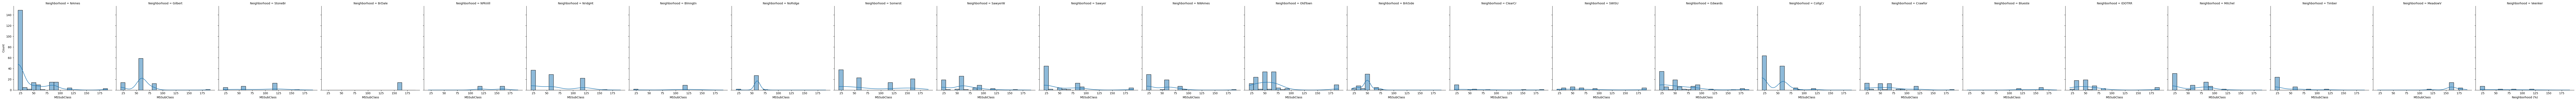

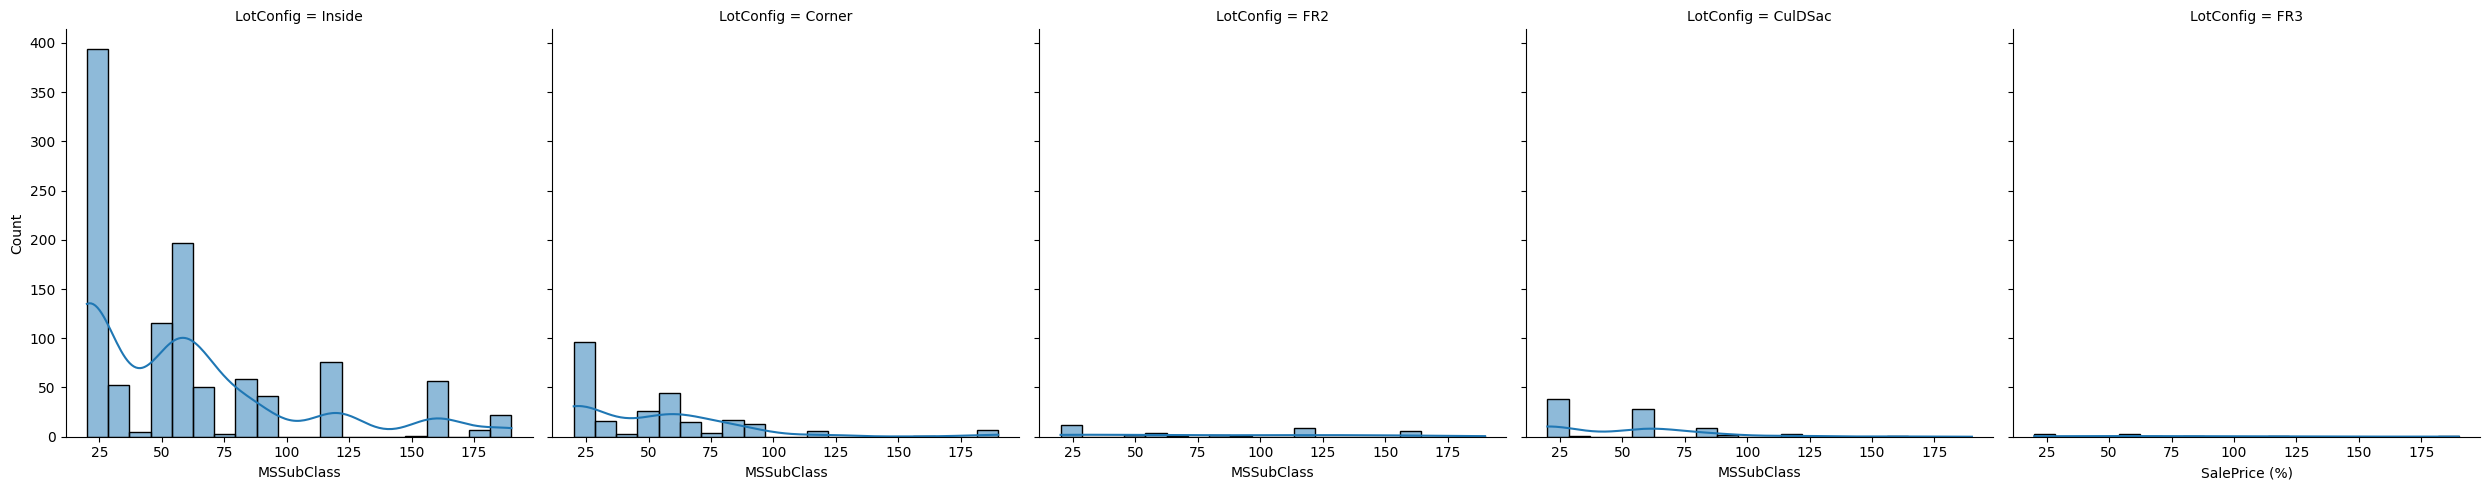

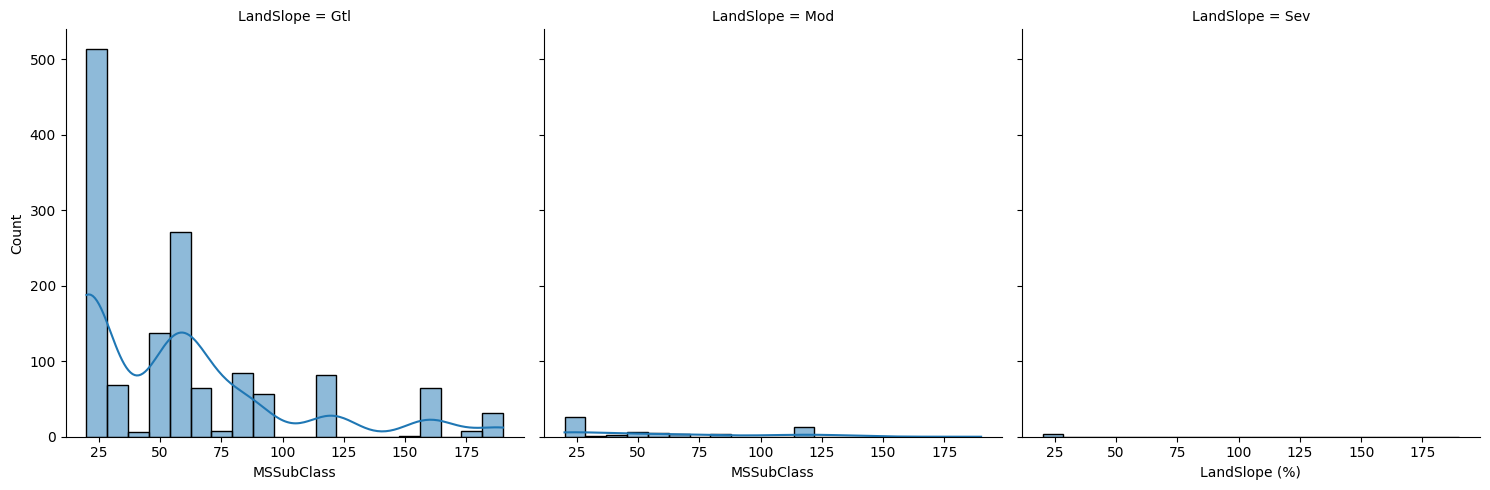

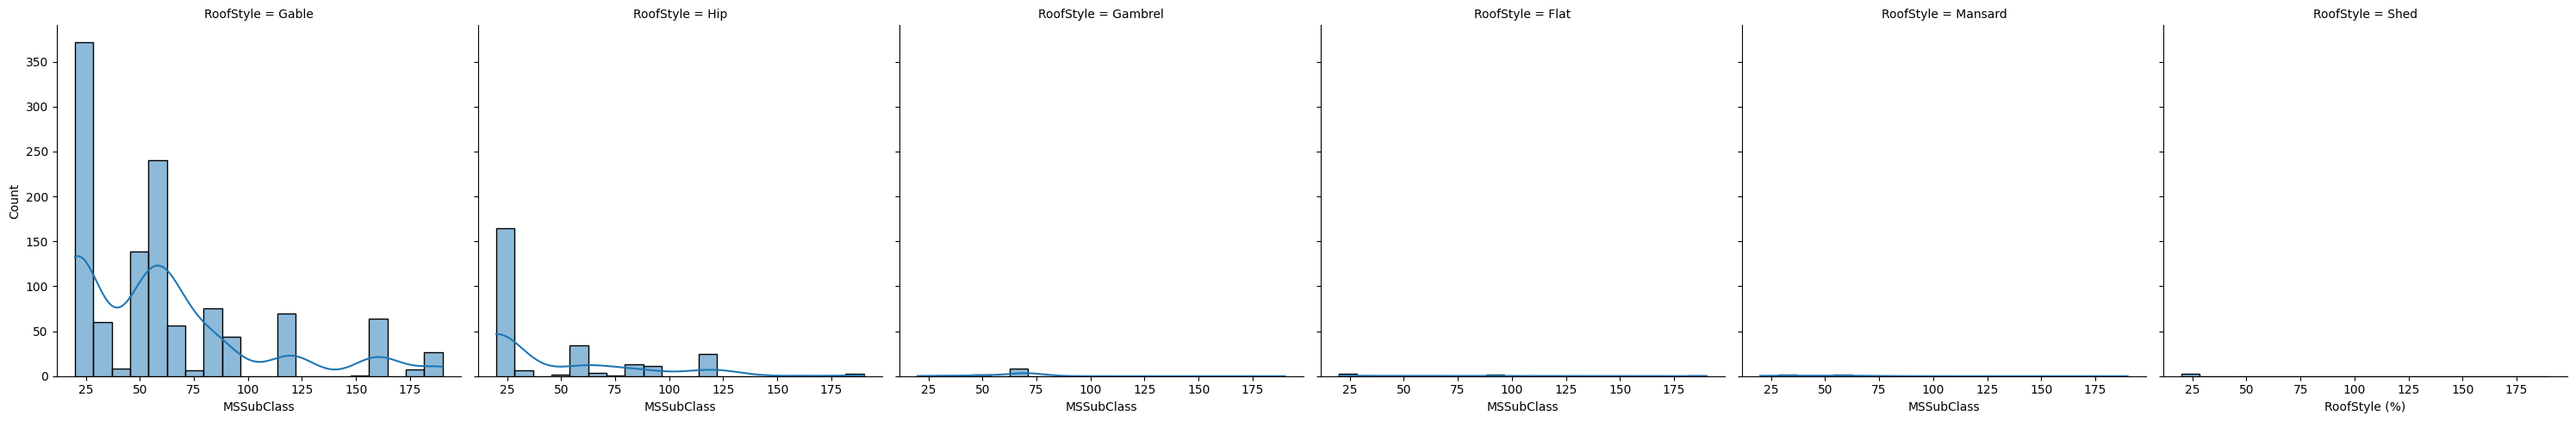

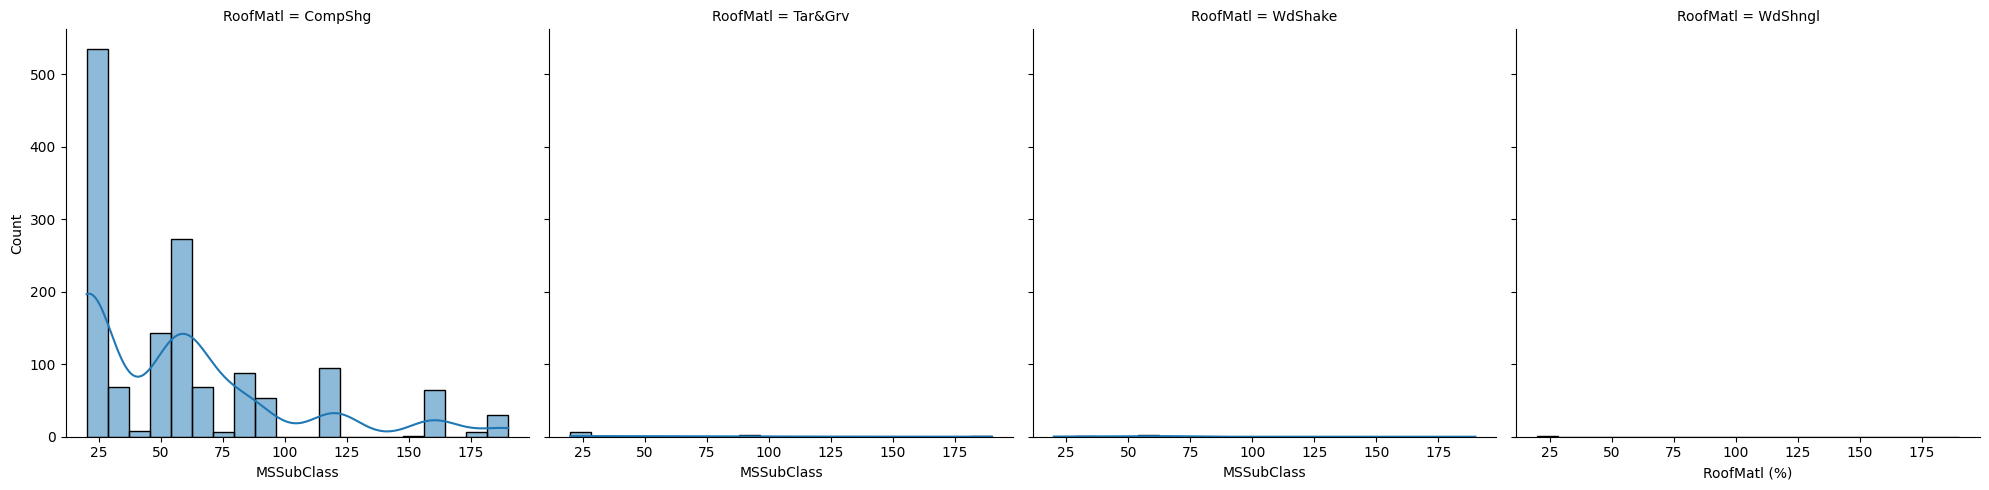

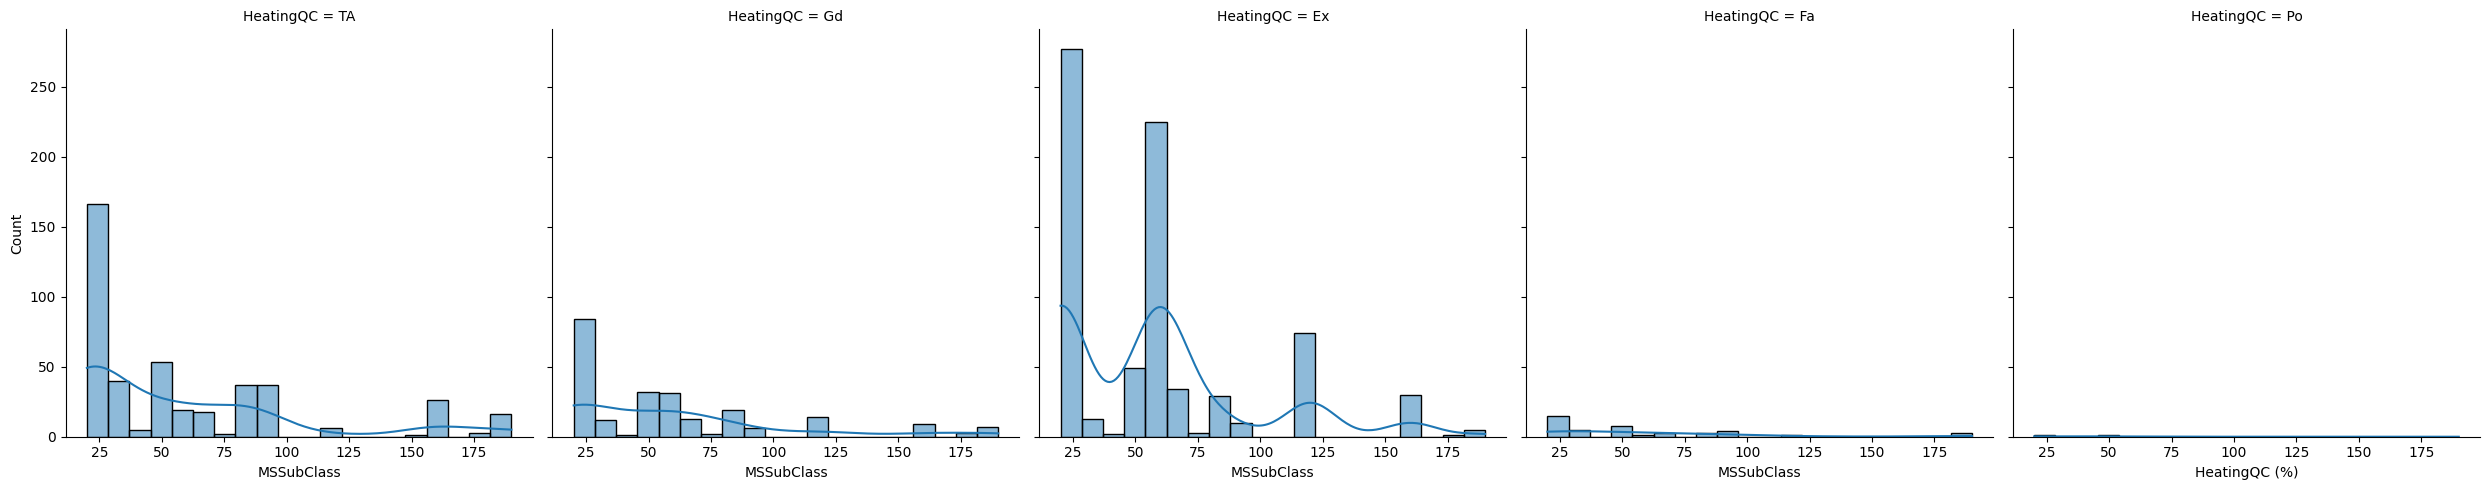

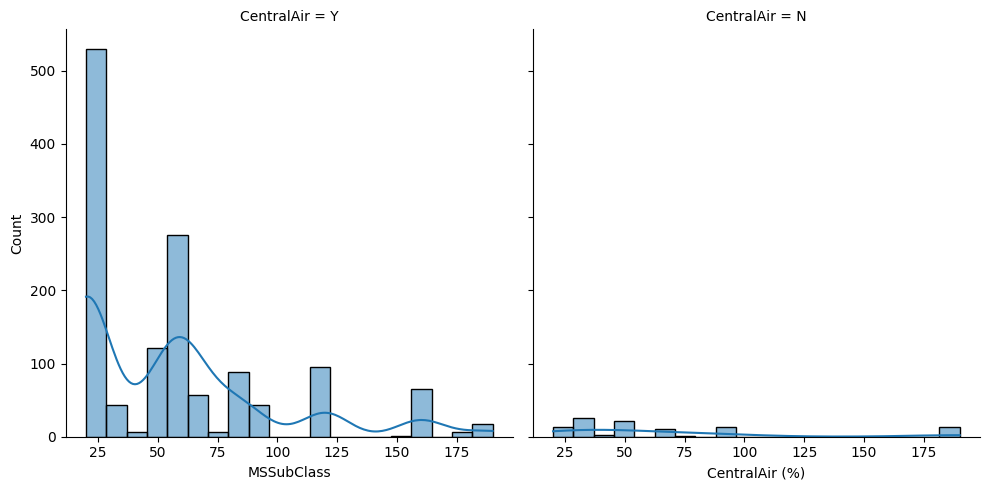

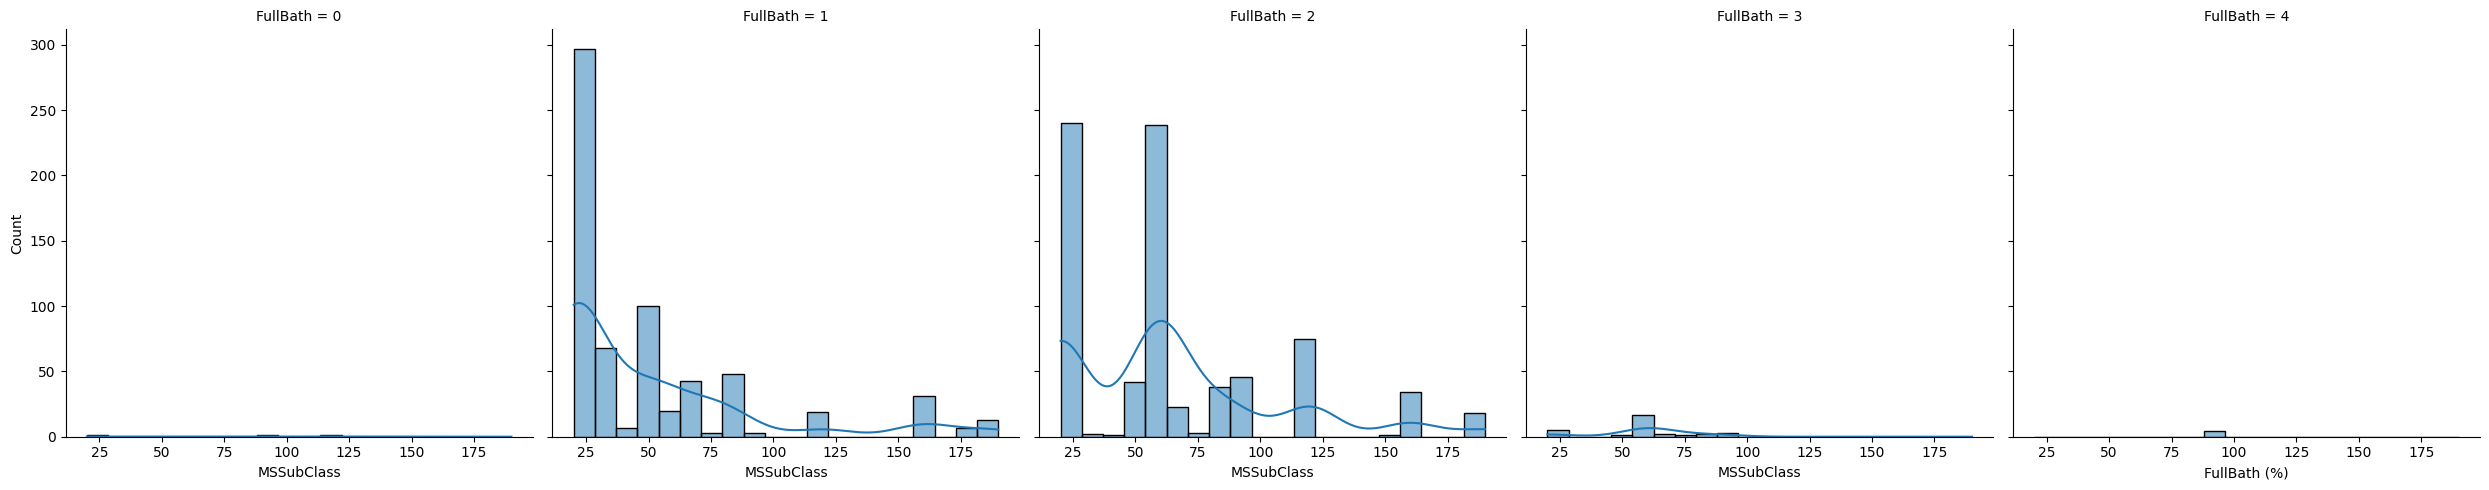

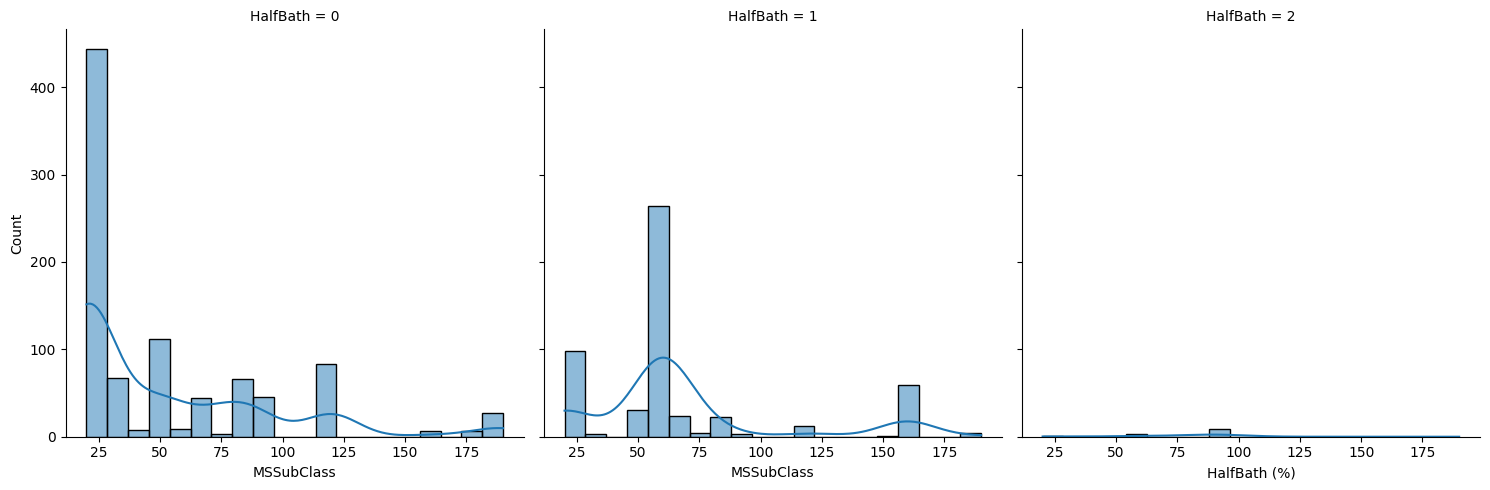

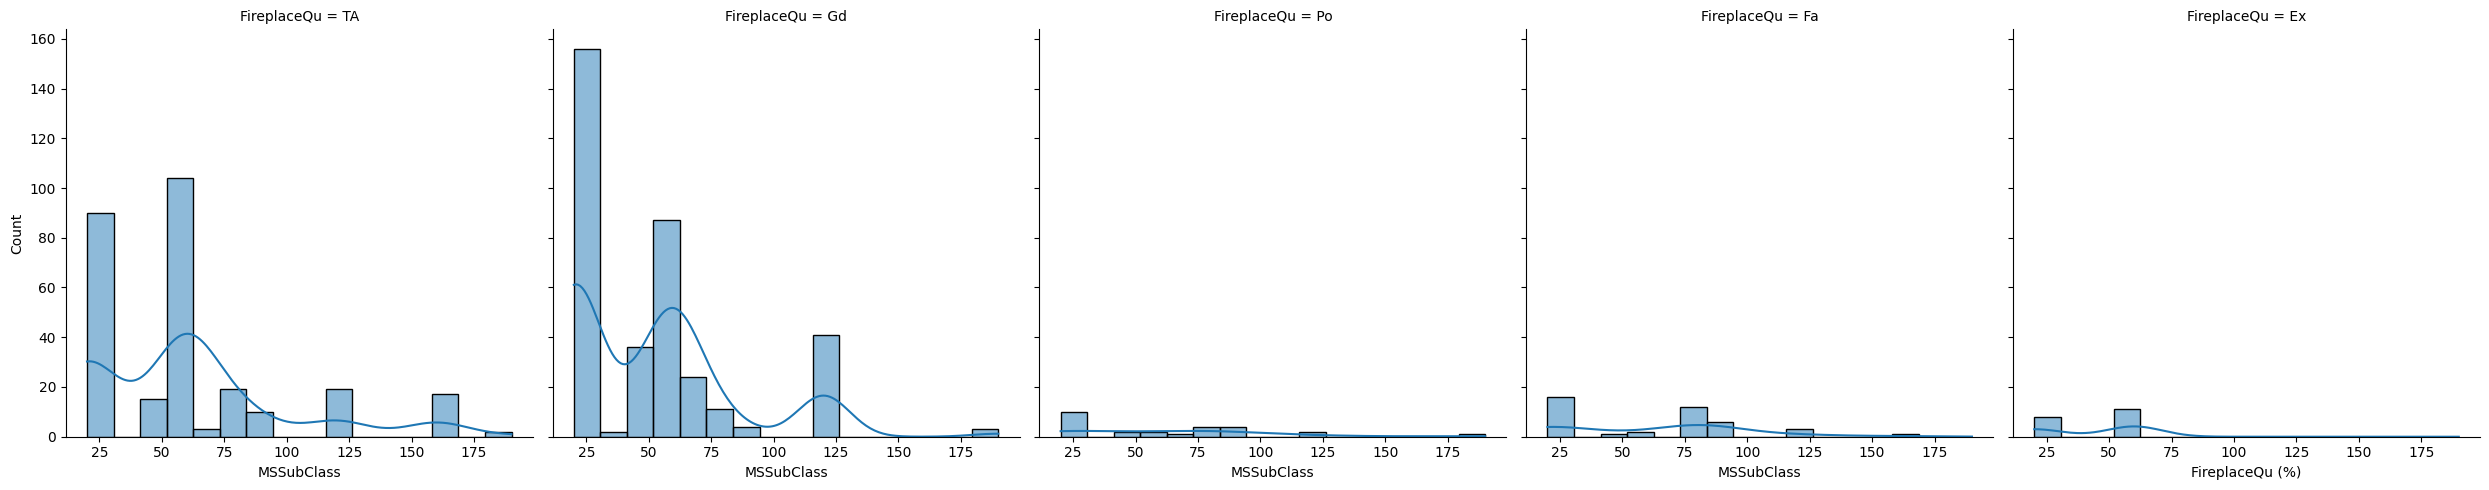

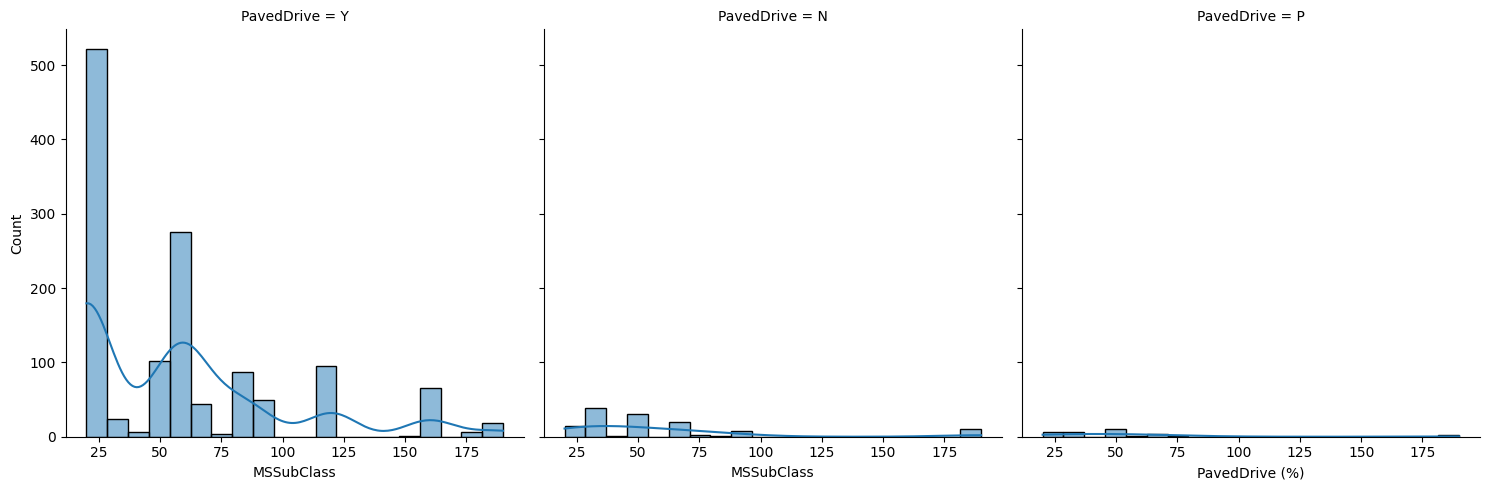

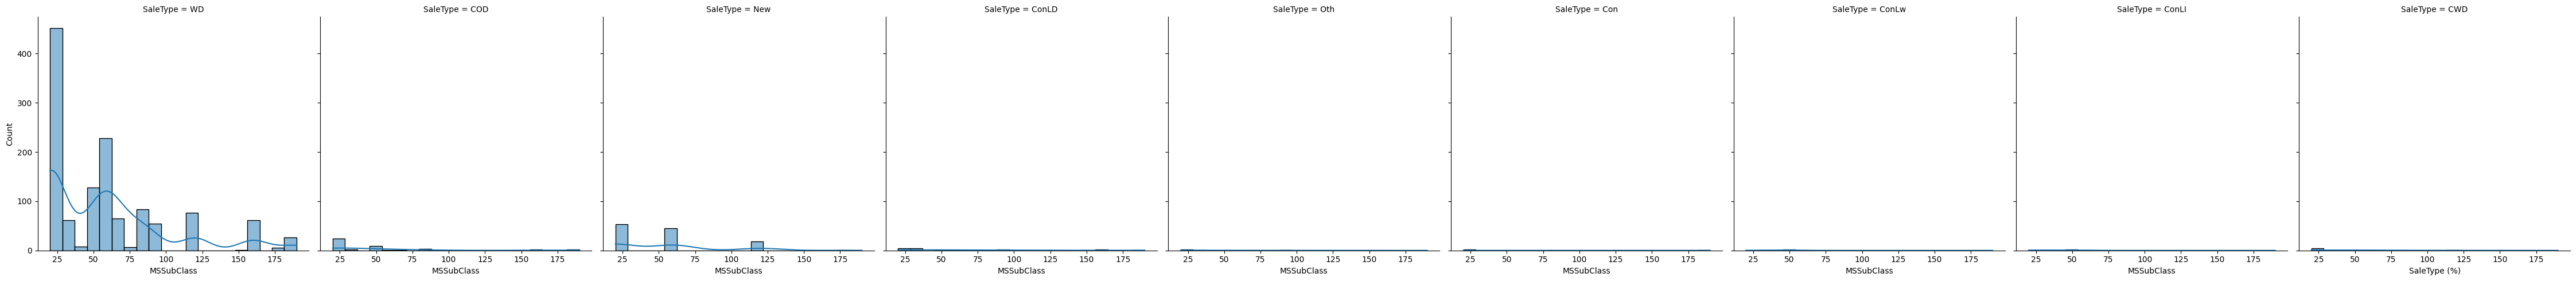

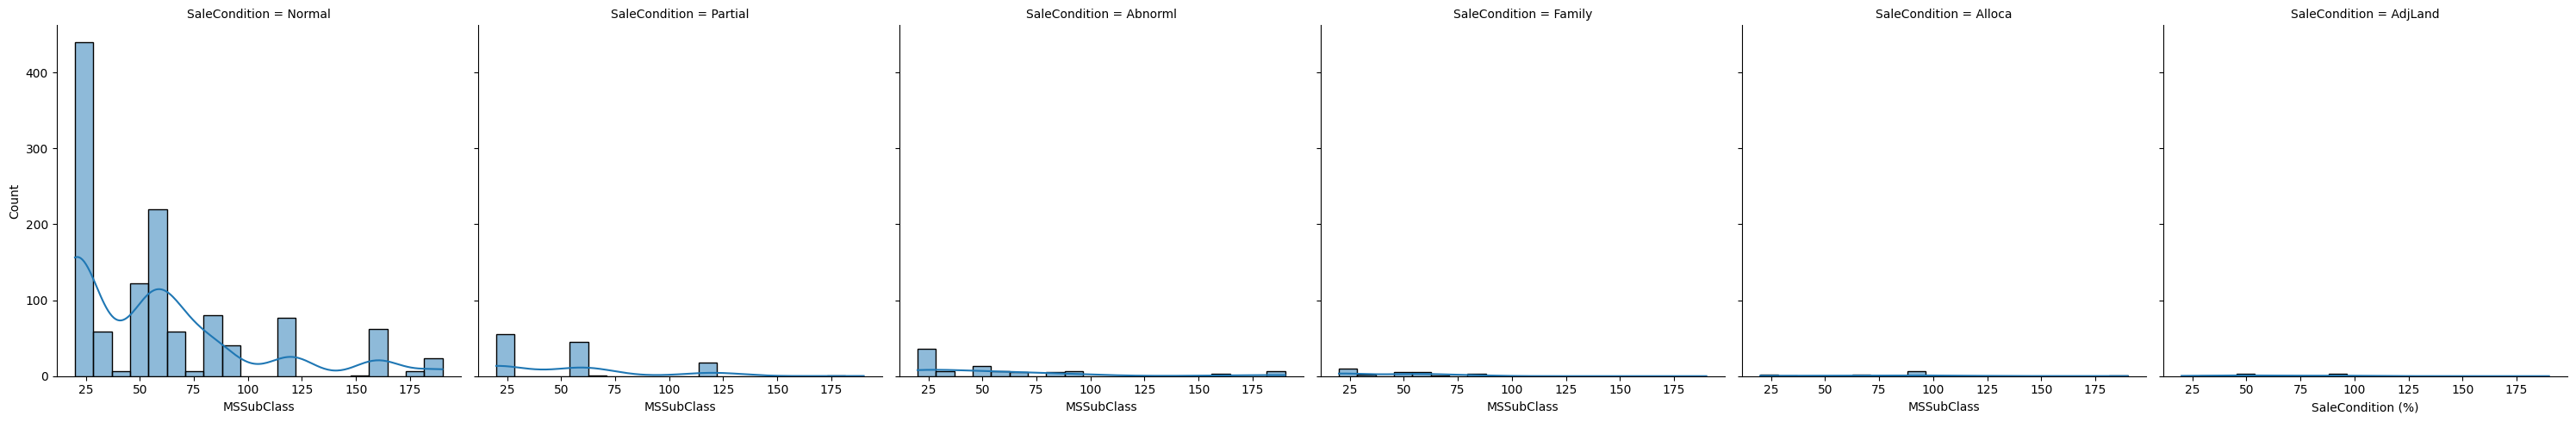

In [70]:
# Histogramas.

# Esse gráfico, permite ver a frequência com que cada valor ou intervalo de valores aparece nos dados, bem
# como identificar possíveis modas ou picos na distribuição.

# Padrão da escala do sns.displot é 10.

# Distribuição por bairro Neighborhood:

# Coluna MSSubClass.
sns.displot(x='MSSubClass', col='Neighborhood', data=data2, kde=True)
plt.xlabel('Neighborhood (%)')
plt.ylabel('Densidade')
plt.tight_layout()
plt.show()

# Distribuição por configuração do lote LotConfig:

# Coluna MSSubClass.
sns.displot(x='MSSubClass', col='LotConfig', data=data2, kde=True)
plt.xlabel('SalePrice (%)')
plt.ylabel('Densidade')
plt.tight_layout()
plt.show()

# Distribuição por terrenos com diferentes inclinações LandSlope:

# Coluna MSSubClass.
sns.displot(x='MSSubClass', col='LandSlope', data=data2, kde=True)
plt.xlabel('LandSlope (%)')
plt.ylabel('Densidade')
plt.tight_layout()
plt.show()

# Distribuição por estilo de telhado RoofStyle:

# Coluna MSSubClass.
sns.displot(x='MSSubClass', col='RoofStyle', data=data2, kde=True)
plt.xlabel('RoofStyle (%)')
plt.ylabel('Densidade')
plt.tight_layout()
plt.show()

# Distribuição por material do telhado RoofMatl:

# Coluna MSSubClass.
sns.displot(x='MSSubClass', col='RoofMatl', data=data2, kde=True)
plt.xlabel('RoofMatl (%)')
plt.ylabel('Densidade')
plt.tight_layout()
plt.show()

# Distribuição por nível de qualidade do sistema de aquecimento HeatingQC:

# Coluna MSSubClass.
sns.displot(x='MSSubClass', col='HeatingQC', data=data2, kde=True)
plt.xlabel('HeatingQC (%)')
plt.ylabel('Densidade')
plt.tight_layout()
plt.show()

# Distribuição por casas com e sem ar condicionado central CentralAir:

# Coluna MSSubClass.
sns.displot(x='MSSubClass', col='CentralAir', data=data2, kde=True)
plt.xlabel('CentralAir (%)')
plt.ylabel('Densidade')
plt.tight_layout()
plt.show()

# Distribuição por banheiros completos FullBath:

# Coluna MSSubClass.
sns.displot(x='MSSubClass', col='FullBath', data=data2, kde=True)
plt.xlabel('FullBath (%)')
plt.ylabel('Densidade')
plt.tight_layout()
plt.show()

# Distribuição por banheiros parcialmente completos HalfBath:

# Coluna MSSubClass.
sns.displot(x='MSSubClass', col='HalfBath', data=data2, kde=True)
plt.xlabel('HalfBath (%)')
plt.ylabel('Densidade')
plt.tight_layout()
plt.show()

# Distribuição por nível de qualidade da lareira FireplaceQu:

# Coluna MSSubClass.
sns.displot(x='MSSubClass', col='FireplaceQu', data=data2, kde=True)
plt.xlabel('FireplaceQu (%)')
plt.ylabel('Densidade')
plt.tight_layout()
plt.show()

# Distribuição por casas com e sem calçada pavimentada PavedDrive:

# Coluna MSSubClass.
sns.displot(x='MSSubClass', col='PavedDrive', data=data2, kde=True)
plt.xlabel('PavedDrive (%)')
plt.ylabel('Densidade')
plt.tight_layout()
plt.show()

# Distribuição por tipo de venda SaleType:

# Coluna MSSubClass.
sns.displot(x='MSSubClass', col='SaleType', data=data2, kde=True)
plt.xlabel('SaleType (%)')
plt.ylabel('Densidade')
plt.tight_layout()
plt.show()

# Distribuição por condição de venda SaleCondition:

# Coluna MSSubClass.
sns.displot(x='MSSubClass', col='SaleCondition', data=data2, kde=True)
plt.xlabel('SaleCondition (%)')
plt.ylabel('Densidade')
plt.tight_layout()
plt.show()

In [71]:
# Descrição:

# Distribuição por configuração do lote LotConfig:

# coluna MSSubClass:
# - a distribuição é assimétrica em relação a configuração inside e corner
# - a presença de outliers
# - as configurações de lote mais escolidas tiveram uma melhor distribuição entre as residências 25 e 50

# Distribuição por terrenos com diferentes inclinações LandSlope:

# coluna MSSubClass:
# - a distribuição é assimétrica em relação a LandSlope GTL
# - a presença de outliers
# - as inclinações mais escolidas tiveram uma melhor distribuição entre as residências 25 e 50

# Distribuição por estilo de telhado RoofStyle:

# coluna MSSubClass:
# - a distribuição é assimétrica entre os estilos de telhado do tipo Gable e Hip
# - a presença de outliers
# - os estilhos de telhados mais escolidos tiveram uma melhor distribuição entre as residências 25 e 50

# Distribuição por material do telhado RoofMatl:

# coluna MSSubClass:
# - a distribuição é assimétrica em CompShg em relação aos demais materiais de telhado
# - a presença de outliers
# - o material de telhado mais escolido teve uma melhor distribuição entre as residências 25 e 50

# Distribuição por nível de qualidade do sistema de aquecimento HeatingQC:

# coluna MSSubClass:
# - a distribuição é assimétrica entre as qualidades Ex, Gd, TA em relação aos demais
# - a presença de outliers
# - os níveis de qualidade Ex e Ta tiveram uma melhor distribuição entre as residências 25 e 50

# Distribuição por casas com e sem ar condicionado central CentralAir:

# coluna MSSubClass:
# - a distribuição é assimétrica
# - a presença de outliers
# - as residências com ar condicionado central tiveram uma melhor distribuição entre as residências 25 e 50

# Distribuição por banheiros completos FullBath:

# coluna MSSubClass:
# - a distribuição é assimétrica entre FullBath 1 e 2
# - a presença de outliers
# - as residências com FullBath 1 tiveram uma melhor distribuição entre as residências 25 e 50

# Distribuição por banheiros parcialmente completos HalfBath:

# coluna MSSubClass:
# - a distribuição é assimétrica entre HalfBath 0 e 1
# - a presença de outliers
# - as residências com HalfBath 0 tiveram uma melhor distribuição entre as residências 25 e 50

# Distribuição por nível de qualidade da lareira FireplaceQu:

# coluna MSSubClass:
# - a distribuição é assimétrica entre nível de qualidade da lareira TA e GD
# - a presença de outliers
# - as residências com lareira de nível de qualidade GD tiveram uma melhor distribuição entre as residências 25 e 50

# Distribuição por casas com e sem calçada pavimentada PavedDrive:

# coluna MSSubClass:
# - a distribuição é assimétrica entre Y e N
# - a presença de outliers
# - as residências com calçada pavimentada Y tiveram uma melhor distribuição entre as residências 25 e 50

# Distribuição por condição de venda SaleCondition:

# coluna MSSubClass:
# - a distribuição é assimétrica em condições de venda normais em relação as demais
# - a presença de outliers
# - as residências com condições de venda normais tiveram uma melhor distribuição entre as residências 25 e 50

In [72]:
# Correlações.
import pandas as pd

df_numerico = data2
df_numerico = pd.DataFrame(df_numerico)

In [73]:
# cópia das colunas que serão utilizadas na matriz de correlação
df_clone = df_numerico[['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']]
df_clone

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF
0,11622,5,6,1961,1961,1.0,730.0,140,0
1,14267,6,6,1958,1958,1.0,312.0,393,36
2,13830,5,5,1997,1998,2.0,482.0,212,34
3,9978,6,6,1998,1998,2.0,470.0,360,36
4,5005,8,5,1992,1992,2.0,506.0,0,82
...,...,...,...,...,...,...,...,...,...
1454,1936,4,7,1970,1970,0.0,0.0,0,0
1455,1894,4,5,1970,1970,1.0,286.0,0,24
1456,20000,5,7,1960,1996,2.0,576.0,474,0
1457,10441,5,5,1992,1992,0.0,0.0,80,32


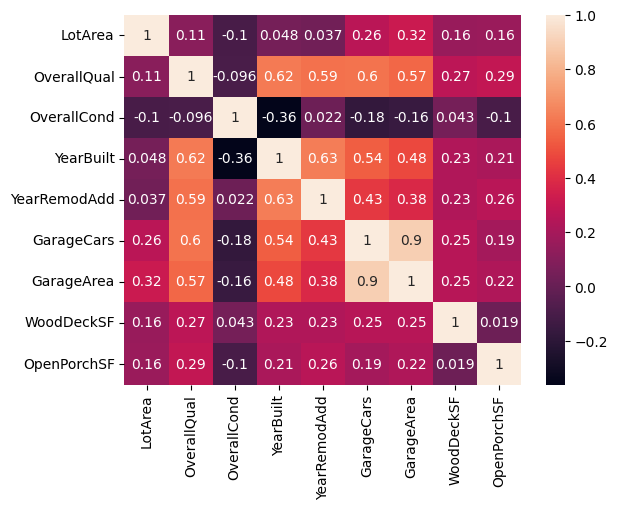

In [74]:
# matriz de correlações
matriz_corr = df_clone.corr()

sns.heatmap(matriz_corr, annot=True)
plt.show()

In [75]:
# Descrição:

# O OverallQual aumentam ou diminui de forma proporcional principalmente por:
# - Ano original de construção da residência(YearBuilt).
# - Ano original de reforma de construção da residência(YearRemodAdd).
# - Número de carros na garagem(GarageCars).
# - Area da garagem(GarageArea).

In [76]:
# 2. Featuring Engineering: Realize a engenharia de características para selecionar as variáveis mais
# importantes para o modelo de regressão.

In [77]:
# Unificando os datasets, adicionando a coluna SalePrice se presente no data2.

if 'SalePrice' in data2.columns:
    data1['SalePrice'] = data2['SalePrice']

In [78]:
# Verificando valores ausentes.

missing_values = data1.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print("Valores ausentes antes do tratamento:\n", missing_values)

Valores ausentes antes do tratamento:
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64


In [79]:
# Tratamento de valores ausentes.
# Inserindo valores numéricos com a mediana, e categóricos com a moda.

num_cols = data1.select_dtypes(include=[np.number]).columns
cat_cols = data1.select_dtypes(exclude=[np.number]).columns

imputer_num = SimpleImputer(strategy='median')
imputer_cat = SimpleImputer(strategy='most_frequent')

data1[num_cols] = imputer_num.fit_transform(data1[num_cols])
data1[cat_cols] = imputer_cat.fit_transform(data1[cat_cols])

In [80]:
# Verificando novamente valores ausentes após o tratamento.

missing_values_after = data1.isnull().sum()
missing_values_after = missing_values_after[missing_values_after > 0]
print("Valores ausentes após o tratamento:\n", missing_values_after)

Valores ausentes após o tratamento:
 Series([], dtype: int64)


In [81]:
# Transformação de variáveis categóricas em numéricas.

data1_encoded = pd.get_dummies(data1, columns=cat_cols, drop_first=True)

In [82]:
# Criando novos dados.

current_year = 2024
data1_encoded['HouseAge'] = current_year - data1_encoded['YearBuilt']
data1_encoded['YearsSinceRemodel'] = current_year - data1_encoded['YearRemodAdd']

# Descrição do dado HouseAge.
# Idade da casa, calculada como a diferença entre o ano atual (2024) e o ano em que a casa foi construída (YearBuilt).

# Descrição do dado YearsSinceRemodel.
# Anos desde a última renovação, calculada como a diferença entre o ano atual (2024) e o ano da última renovação (YearRemodAdd).

In [83]:
# Visualizando as primeiras linhas do dataset processado e normalizado.

data1_encoded.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,HouseAge,YearsSinceRemodel
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,False,False,True,False,False,False,True,False,21.0,21.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,False,False,True,False,False,False,True,False,48.0,48.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,False,False,True,False,False,False,True,False,23.0,22.0
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,False,False,True,False,False,False,False,False,109.0,54.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,False,False,True,False,False,False,True,False,24.0,24.0


In [84]:
# 3. Aprendizagem Supervisionada:
#    a. Regressão Linear: Crie um modelo de regressão linear simples ou múltipla para prever o preço
#       de venda de uma casa.
#    b. Classificação: Converta a variável de saída em uma variável binária e crie um modelo de
#       classificação para prever se uma casa será vendida por um preço alto ou baixo.

In [85]:
# Carregando os datasets.

from google.colab import drive
drive.mount('/content/drive')

data1 = pd.read_csv('/content/drive/My Drive/test.csv')
data2 = pd.read_csv('/content/drive/My Drive/train.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
data1 = pd.DataFrame(data1)
data1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [87]:
data2 = pd.DataFrame(data2)
data2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [88]:
# Juntar os dados para o pré-processamento.
data1['SalePrice'] = np.nan # Adicionando uma coluna 'SalePrice' ao dataset 'data1' preenchida com NaN.
data = pd.concat([data2, data1], ignore_index=True)  # Concatenando os datasets 'data1' e 'data2'.

# Preencher valores ausentes
data['LotFrontage'].fillna(data['LotFrontage'].mean(), inplace=True) # Preenchendo valores ausentes em 'LotFrontage' com a média.
data['MasVnrArea'].fillna(0, inplace=True) # Preenchendo valores ausentes em 'MasVnrArea' com 0.
data['GarageYrBlt'].fillna(data['GarageYrBlt'].median(), inplace=True) # Preenchendo valores ausentes em 'GarageYrBlt' com a mediana.

# Preencher variáveis categóricas com a moda
categorical_cols = data.select_dtypes(include=['object']).columns # Selecionando as colunas categóricas.
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True) # Preenchendo valores ausentes com a moda de cada coluna categórica.

# Separar os dados novamente
train_data = data.loc[data['SalePrice'].notna()] # Dados de treino são aqueles em que 'SalePrice' não é NaN.
test_data = data.loc[data['SalePrice'].isna()].drop(columns='SalePrice') # Dados de teste são aqueles em que 'SalePrice' é NaN.

# Features e target
X = train_data.drop(columns=['SalePrice', 'Id']) # Features são todas as colunas exceto 'SalePrice' e 'Id'.
y = train_data['SalePrice']  # Target é a coluna 'SalePrice'.

# Lista de variáveis numéricas e categóricas.
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Dividindo em 80% treino e 20% teste

In [90]:
# Pipeline para pré-processamento e modelo.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),  # Padronizando as variáveis numéricas.
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols) # Codificando as variáveis categóricas.
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor), # Pré-processamento.
    ('regressor', LinearRegression()) # Modelo de Regressão Linear.
])

# Treinamento do modelo
model.fit(X_train, y_train)  # Ajustando o modelo aos dados de treino.

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBat...
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('regressor', LinearRegression())])

In [91]:
# Previsões.
y_pred_train = model.predict(X_train) # Previsões nos dados de treino.
y_pred_test = model.predict(X_test) # Previsões nos dados de teste.

# Métricas
mae_train = mean_absolute_error(y_train, y_pred_train) # MAE nos dados de treino.
mse_train = mean_squared_error(y_train, y_pred_train)# MSE nos dados de treino.
rmse_train = np.sqrt(mse_train) # RMSE nos dados de treino.
r2_train = r2_score(y_train, y_pred_train) # R² nos dados de treino.

mae_test = mean_absolute_error(y_test, y_pred_test) # MAE nos dados de test.
mse_test = mean_squared_error(y_test, y_pred_test) # MSE nos dados de test.
rmse_test = np.sqrt(mse_test) # RMSE nos dados de test.
r2_test = r2_score(y_test, y_pred_test) # R² nos dados de test.

# Resultados.
print(f'Treino - MAE: {mae_train}, MSE: {mse_train}, RMSE: {rmse_train}, R2: {r2_train}')
print(f'Teste - MAE: {mae_test}, MSE: {mse_test}, RMSE: {rmse_test}, R2: {r2_test}')

Treino - MAE: 12677.137433343689, MSE: 381431467.876958, RMSE: 19530.27055309163, R2: 0.9360502563327104
Teste - MAE: 18288.130354518817, MSE: 868689833.2897775, RMSE: 29473.544633955677, R2: 0.8867466897984323


In [92]:
# Concatenar os dados.
data = pd.concat([data1, data2], ignore_index=True)


# Lista de variáveis numéricas e categóricas.
num_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = data.select_dtypes(include=['object']).columns.tolist()

# Remover a coluna 'SalePrice' das colunas numéricas.
num_cols.remove('SalePrice')

# Pipeline para pré-processamento.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), num_cols),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), cat_cols)
    ])

# Pipeline completo com o modelo.
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Separar os dados de treino e teste.
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

# Dividir os dados em conjuntos de treino e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preencher valores NaN na variável alvo (y_train) com a média.
y_train.fillna(y_train.mean(), inplace=True)

# Treinamento do modelo.
model.fit(X_train, y_train)

# Previsões nos dados de teste.
y_pred_test = model.predict(X_test)

# Preencher valores NaN na variável y_test com a média.
y_test.fillna(y_test.mean(), inplace=True)

# Métricas de desempenho.
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print(f'Teste - MAE: {mae_test}, MSE: {mse_test}, RMSE: {rmse_test}, R2: {r2_test}')

# Previsão para o dataset original (data1).
# Garantir que data1 tenha as mesmas colunas que X (excluindo 'SalePrice').
X_new = data1[X.columns]

# Prever os preços de venda para data1.
predictions = model.predict(X_new)

# Adicionar as previsões ao dataframe original.
data1['SalePrice_Pred'] = predictions

# Salvar as previsões em um arquivo CSV.
data1.to_csv('previsoes_vendas.csv', index=False)

# Visualizar as previsões em uma tabela.
print("\nPrevisões de Vendas:\n")
print(data1[['Id', 'SalePrice_Pred']].head(10))

Teste - MAE: 32605.297630467427, MSE: 1978978902.7232423, RMSE: 44485.71571553325, R2: 0.3789309227175982

Previsões de Vendas:

     Id  SalePrice_Pred
0  1461   157930.305061
1  1462   139850.561170
2  1463   174484.128653
3  1464   190083.885539
4  1465   165724.852140
5  1466   180513.858048
6  1467   165519.600378
7  1468   163618.892108
8  1469   184086.470293
9  1470   147758.079613


In [93]:
# 4. Aprendizagem não supervisionada:
#    a. Clusterização: Use um algoritmo de clusterização para identificar grupos de casas com
#       características semelhantes.
#    b. Redução de dimensionalidade: Use uma técnica de redução de dimensionalidade para
#       visualizar os dados em um espaço de menor dimensão.
#    c. Análise de associação: Use o algoritmo Apriori para identificar associações entre as
#       características das casas.
#    d. Análise de outlier: Use o algoritmo Local Outlier Factor para identificar casas que podem ser
#       consideradas outliers.

In [94]:
print(data2.head())
print(data2.info())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [95]:
print(data1.head())
print(data1.info())

     Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... PoolQC  Fence MiscFeature MiscVal MoSold YrSold  \
0         Lvl    AllPub  ...    NaN  MnPrv         NaN       0      6   2010   
1         Lvl    AllPub  ...    NaN    NaN        Gar2   12500      6   2010   
2         Lvl    AllPub  ...    NaN  MnPrv         NaN       0      3   2010   
3         Lvl    AllPub  ...    NaN    NaN         NaN       0      6   2010   
4         HLS    AllPub  ...    NaN    NaN         NaN       0      1   2010   

  SaleType  SaleCondition  SalePrice  SalePrice_Pred  
0      

In [96]:
numerical_features = data2.select_dtypes(include=['int64', 'float64']).columns
data2 = data2[numerical_features].dropna()

In [97]:
scaler = StandardScaler()
train_scaled = scaler.fit_transform(data2)

In [98]:
kmeans = KMeans(n_clusters=3, random_state=42)
data2['Cluster'] = kmeans.fit_predict(train_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


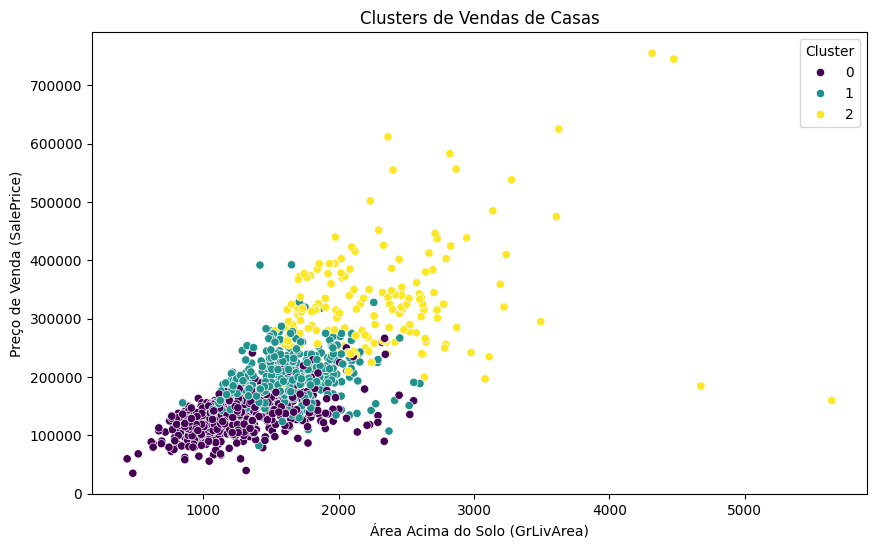

In [99]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data2, x='GrLivArea', y='SalePrice', hue='Cluster', palette='viridis')
plt.title('Clusters de Vendas de Casas')
plt.xlabel('Área Acima do Solo (GrLivArea)')
plt.ylabel('Preço de Venda (SalePrice)')
plt.show()

In [100]:
# O código fornecido realiza a clusterização de um dataset de preços de casas nos EUA utilizando o algoritmo K-Means. A seguir, descrevo o processo e as etapas principais realizadas pelo código:

# Importação de Bibliotecas:
# O código importa as bibliotecas necessárias, como pandas para manipulação de dados, numpy para operações numéricas, StandardScaler e KMeans do sklearn para normalização e clusterização, e matplotlib e seaborn para visualização dos dados.

# Leitura dos Dados:
# Os arquivos CSV contendo os dados de treinamento e teste são lidos utilizando o pandas. Esses datasets contêm várias características das casas, incluindo o preço de venda (SalePrice).

# Exploração Inicial dos Dados:
# O código exibe as primeiras linhas e informações gerais dos datasets para entender a estrutura e o tipo dos dados disponíveis.

# Seleção e Limpeza das Características Numéricas:
# Apenas as características numéricas dos dados são selecionadas para a clusterização. O código descarta as linhas com valores ausentes (NaN) para garantir que o algoritmo de clusterização funcione corretamente.

# Normalização dos Dados:
# Os dados são normalizados utilizando StandardScaler para que todas as características tenham a mesma escala. Isso é importante para o algoritmo K-Means, que é sensível às diferenças de escala entre as características.

# Aplicação do Algoritmo K-Means:
# O algoritmo K-Means é aplicado aos dados normalizados para identificar 3 clusters distintos. O número de clusters foi definido como 3, mas pode ser ajustado conforme necessário. Cada casa é atribuída a um cluster.

# Visualização dos Clusters:
# Finalmente, os clusters resultantes são visualizados utilizando um gráfico de dispersão (scatter plot). O gráfico mostra a relação entre a área acima do solo (GrLivArea) e o preço de venda (SalePrice), com as casas coloridas de acordo com o cluster ao qual pertencem.

In [101]:
# 5. Métricas de avaliação e comparação: Use diferentes métricas para avaliar o desempenho dos
#    modelos criados e compará-los.

In [102]:
# Juntar os dados para o pré-processamento
data1['SalePrice'] = np.nan
concat_data = pd.concat([data2, data1], ignore_index=True)

# Preencher valores ausentes
concat_data['LotFrontage'].fillna(concat_data['LotFrontage'].mean(), inplace=True)
concat_data['MasVnrArea'].fillna(0, inplace=True)
concat_data['GarageYrBlt'].fillna(concat_data['GarageYrBlt'].median(), inplace=True)

# Preencher variáveis categóricas com a moda
categorical_cols = concat_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    concat_data[col].fillna(concat_data[col].mode()[0], inplace=True)

# Separar os dados novamente
train_concat_data = concat_data.loc[concat_data['SalePrice'].notna()]
test_concat_data = concat_data.loc[concat_data['SalePrice'].isna()].drop(columns='SalePrice')

# Features e target
X = data2.drop(columns=['SalePrice', 'Id'])
y = data2['SalePrice']

# Lista de variáveis numéricas e categóricas
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), num_cols),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), cat_cols)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False)),
    ('regressor', LinearRegression())
])


model.fit(X_train, y_train)


y_pred = model.predict(X_test)

# Calculo de métricas escolhidas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 23613.76051042324
MSE: 1588137116.5649223
RMSE: 39851.438073988276
R²: 0.7986468255346401


In [103]:
# Referências.

# Gemini.
# ChatGPT.
# https://pt.stackoverflow.com/questions/549800/como-criar-um-dataframe-copiando-somente-colunas-escolhidas-de-outro-dataframe
# https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/
# https://www.statology.org/label-encoding-in-python/